In [1]:
import numpy as np
from matplotlib import pyplot as plt

rng = np.random.default_rng(123)

In [2]:
def make_normal_strategies(rng, strategies, memory, loc=0, scale=1):
    a = rng.normal(loc=loc, scale=scale, size=(strategies))
    return np.vstack([a, 1-a]).T

make_normal_strategies(rng, 5, 2)

array([[-0.98912135,  1.98912135],
       [-0.36778665,  1.36778665],
       [ 1.28792526, -0.28792526],
       [ 0.19397442,  0.80602558],
       [ 0.9202309 ,  0.0797691 ]])

In [3]:
class History(np.ndarray):
    def __new__(cls, input_array):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        return obj

    def __array_finalize__(self, obj):
        # see InfoArray.__array_finalize__ for comments
        if obj is None: return
        
        [c_4, c_3, c_2, c_1] = obj
        
        # error function is flat in this case
        if c_2 == c_3 and c_3 == c_4:
            self.flat = True
            return
        
        self.a_1 = (c_2 - c_3)**2 + (c_3 - c_4)**2
        self.a_2 = 2 * ((c_2 - c_3) * (c_3 - c_1) + (c_3 - c_4) * (c_4 - c_2))
        self.a_3 = (c_3 - c_1)**2 + (c_4 - c_2)**2
        
        self.opt_a = -self.a_2 / (2*self.a_1)
        self.err_min = self.a_1 * self.opt_a**2 + self.a_2 * self.opt_a + self.a_3
        
    def C(self, x):  
        return self.a_1 * x**2 + self.a_2 * x + self.a_3

    def c1(self,x):
        # this is the lower of two values of a such that
        # C(a) = C(x)
        # when applicable
        return (x < self.opt_a).astype(int) * x + (x >= self.opt_a).astype(int) * (2 * self.opt_a - x)
        

    def c2(self,x):
        # this is the lower of two values of a such that
        # C(a) = x
        # when applicable
        return (x >= self.opt_a).astype(int) * x + (x < self.opt_a).astype(int) * (2 * self.opt_a - x)

hist = rng.choice(100, size=4)
h = History(hist)
h.c1(1.8)

-1.7309557774607705

In [4]:
h.c2(1.8)

1.8

In [5]:
h.c1(1.8)

-1.7309557774607705

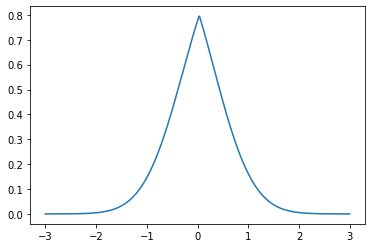

In [6]:
from scipy.stats import norm

def f_normal(h, a, s):
    return s / np.sqrt(2 * np.pi)  * (
        1 - norm.cdf(h.c2(a)) + norm.cdf(h.c1(a))
    )**(s-1) * np.exp(-a**2/2)


s = 2
a = np.arange(-3.001, 3, 0.01)

plt.plot(a, f_normal(h, a, s))

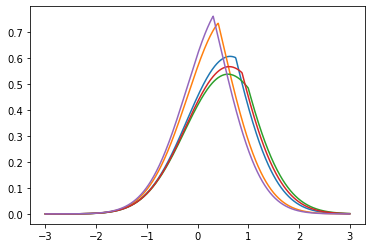

In [7]:
plt.figure()

for _ in range(5):
    hist = rng.choice(100, size=4)
    h = History(hist)
    
    plt.plot(a, f_normal(h, a, s))

In [8]:
from OOEFBP import EFBPSim

sim = EFBPSim(
    memory=2, 
    strategies=2,
    start=hist, 
    n_iter=1,
    agents=1500,
    strategy_func=make_normal_strategies
)

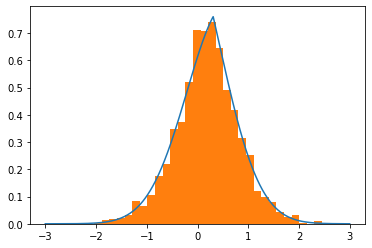

In [9]:
plt.plot(a, f_normal(h, a, s))
__ = plt.hist(sim.first_a(),bins=30, density=True)

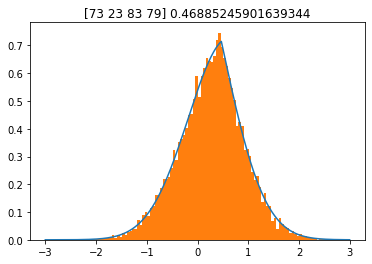

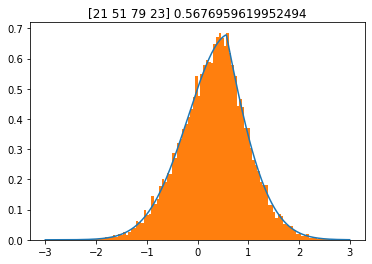

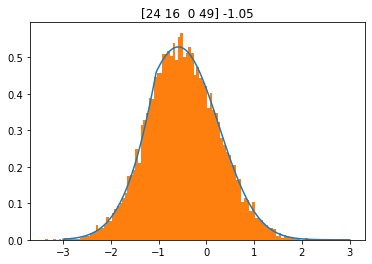

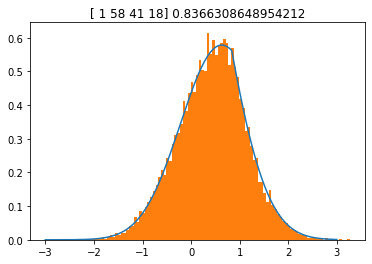

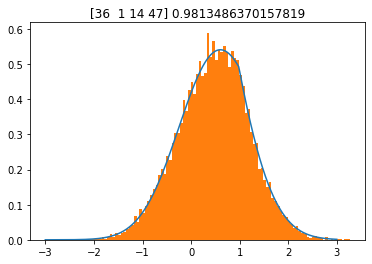

In [10]:
s = 2

for _ in range(5):
    hist = rng.choice(100, size=4)
    h = History(hist)
    
    sim = EFBPSim(
        memory=2, 
        strategies=s,
        start=h, 
        n_iter=1,
        agents=15000,
        strategy_func=make_normal_strategies
    )
    
    plt.figure()
    plt.plot(a, f_normal(h, a, s))
    __ = plt.hist(sim.first_a(),bins=100, density=True)
    plt.title(f"{hist} {h.opt_a}")

/Users/rebecca/.pyenv/versions/3.9.5/envs/jupyter/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[41 62 54 94]')

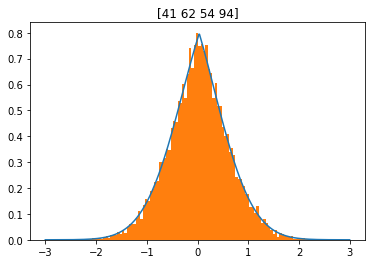

In [11]:
hist = np.array([41,62,54,94])
h = History(hist)

sim = EFBPSim(
    memory=2, 
    strategies=2,
    start=hist, 
    n_iter=1,
    agents=15000,
    strategy_func=make_normal_strategies
)

plt.figure()
plt.plot(a, f_normal(h, a, s))
__ = plt.hist(sim.first_a(),bins=100, density=True)
plt.title(hist)

/Users/rebecca/.pyenv/versions/3.9.5/envs/jupyter/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[40 43 81 48]')

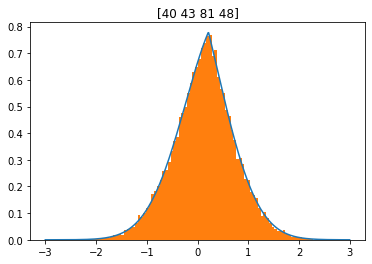

In [12]:
hist = np.array([40,43,81,48])
h = History(hist)

sim = EFBPSim(
    memory=2, 
    strategies=2,
    start=hist, 
    n_iter=1,
    agents=30000,
    strategy_func=make_normal_strategies
)

plt.figure()
plt.plot(a, f_normal(h, a, s))
__ = plt.hist(sim.first_a(),bins=100, density=True)
plt.title(hist)

In [13]:
# the wrong one
hist = np.array([41,62,54,94])
h = History(hist)

print(f"C(x) = {h.a_1}x^2 + {h.a_2}x + {h.a_3}")
h.opt_a

C(x) = 505x^2 + -34x + 1193


0.033663366336633666

In [14]:
hist = np.array([40,43,81,48])
h = History(hist)

print(f"C(x) = {h.a_1}x^2 + {h.a_2}x + {h.a_3}")
h.opt_a

C(x) = 1453x^2 + -626x + 1706


0.21541637990364762

In [15]:
hist = np.array([25,51,50,40])
h = History(hist)

print(f"C(x) = {h.a_1}x^2 + {h.a_2}x + {h.a_3}")
h.opt_a

C(x) = 677x^2 + -1322x + 746


0.9763663220088626

In [16]:
hist = np.array([53,57,97,7])
h = History(hist)

print(f"C(x) = {h.a_1}x^2 + {h.a_2}x + {h.a_3}")
h.opt_a

C(x) = 1616x^2 + 3648x + 4436


-1.1287128712871286

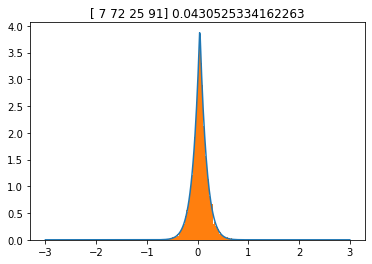

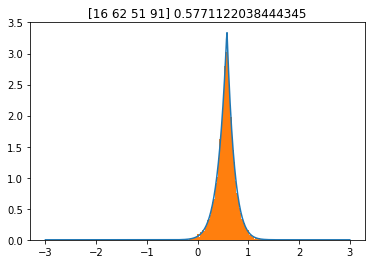

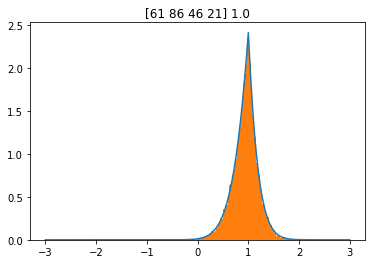

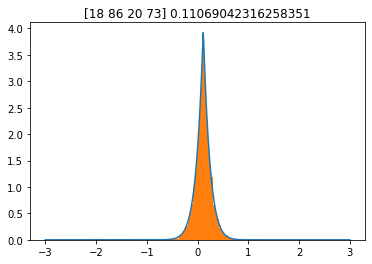

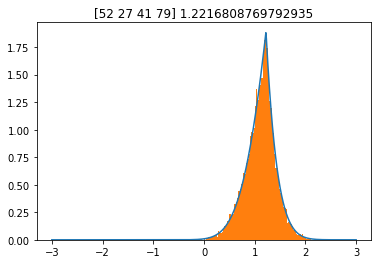

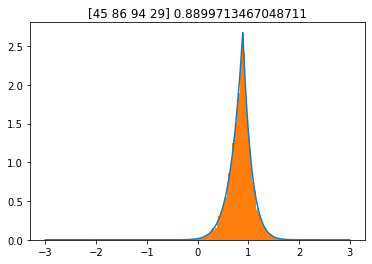

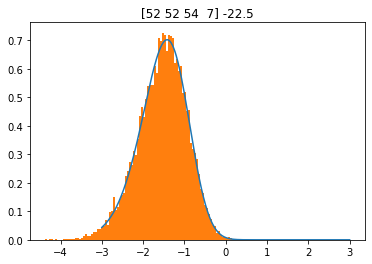

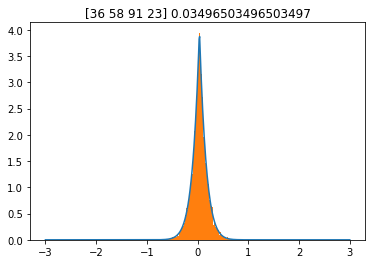

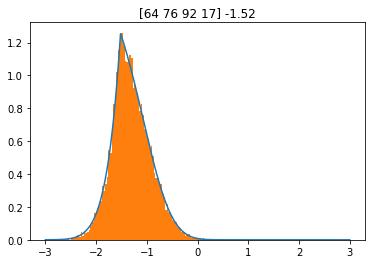

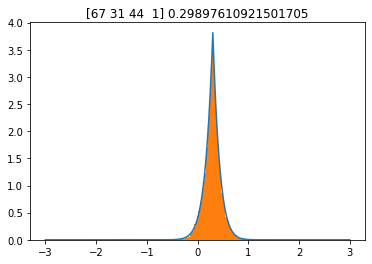

In [17]:
s = 10

for _ in range(10):
    hist = rng.choice(100, size=4)
    h = History(hist)
    
    sim = EFBPSim(
        memory=2, 
        strategies=s,
        start=hist, 
        n_iter=1,
        agents=15000,
        strategy_func=make_normal_strategies
    ) 
    
    plt.figure()
    plt.plot(a, f_normal(h, a, s))
    __ = plt.hist(sim.first_a(),bins=100, density=True)
    plt.title(f"{hist} {h.opt_a}")

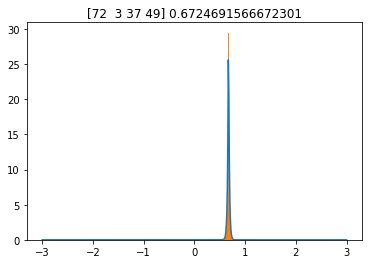

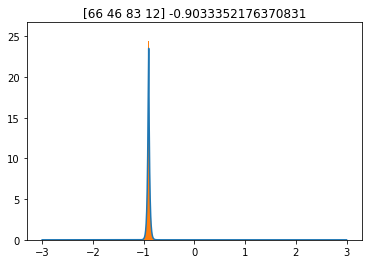

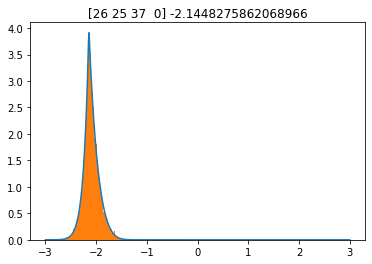

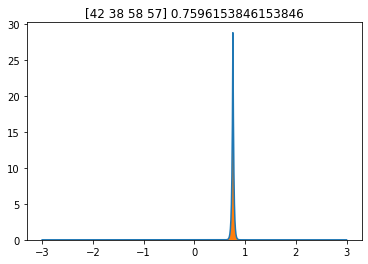

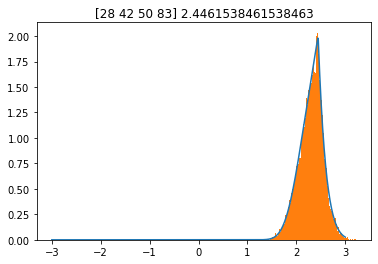

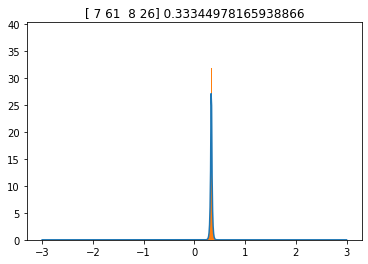

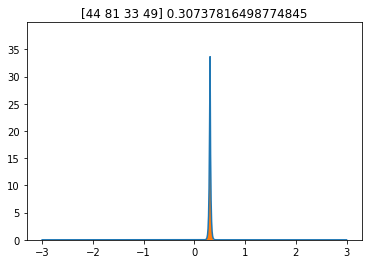

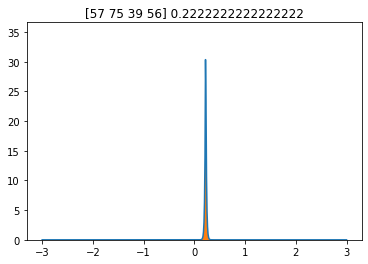

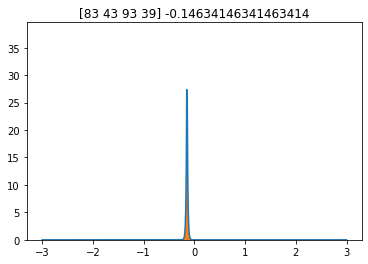

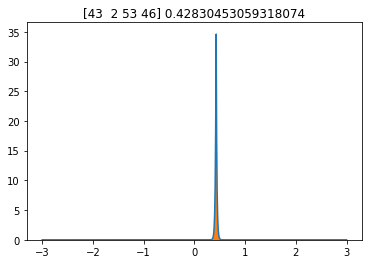

In [18]:
s = 100

for _ in range(10):
    hist = rng.choice(100, size=4)
    h = History(hist)
    
    sim = EFBPSim(
        memory=2, 
        strategies=s,
        start=hist, 
        n_iter=1,
        agents=15000,
        strategy_func=make_normal_strategies
    ) 
    
    plt.figure()
    plt.plot(a, f_normal(h, a, s))
    __ = plt.hist(sim.first_a(),bins=100, density=True)
    plt.title(f"{hist} {h.opt_a}")

Okay this works now that I have the right simulation.  So the question is, what now?  I think 2 things:

1. Extend the strategy distribution
2. Connect this PDF back to the map (width of distribution vs. size of fluctuations)

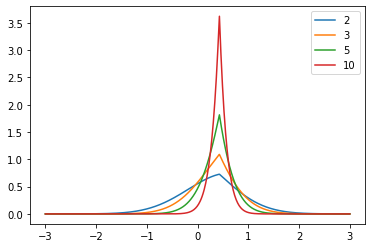

In [28]:
plt.plot(a, f_normal(h,a, 2 ))
plt.plot(a, f_normal(h,a, 3 ))
plt.plot(a, f_normal(h,a, 5 ))
plt.plot(a, f_normal(h,a, 10 ))

plt.legend([2,3,5,10])

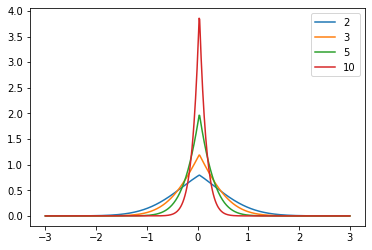

In [29]:
hist = rng.choice(100, size=4)
h = History(hist)

plt.plot(a, f_normal(h,a, 2 ))
plt.plot(a, f_normal(h,a, 3 ))
plt.plot(a, f_normal(h,a, 5 ))
plt.plot(a, f_normal(h,a, 10 ))

plt.legend([2,3,5,10])

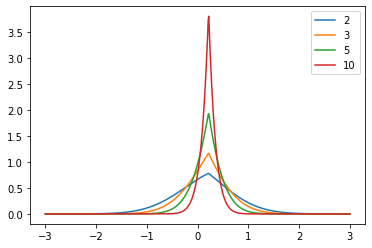

In [30]:
hist = rng.choice(100, size=4)
h = History(hist)

plt.plot(a, f_normal(h,a, 2 ))
plt.plot(a, f_normal(h,a, 3 ))
plt.plot(a, f_normal(h,a, 5 ))
plt.plot(a, f_normal(h,a, 10 ))

plt.legend([2,3,5,10])

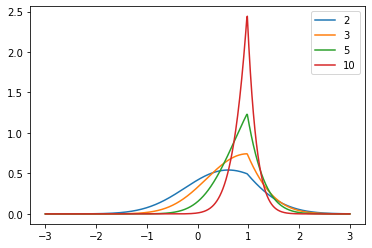

In [31]:
hist = rng.choice(100, size=4)
h = History(hist)

plt.plot(a, f_normal(h,a, 2 ))
plt.plot(a, f_normal(h,a, 3 ))
plt.plot(a, f_normal(h,a, 5 ))
plt.plot(a, f_normal(h,a, 10 ))

plt.legend([2,3,5,10])

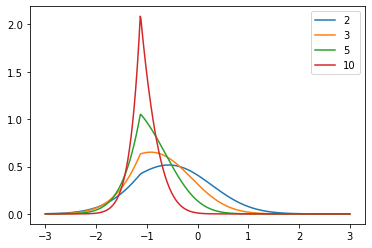

In [32]:
hist = rng.choice(100, size=4)
h = History(hist)

plt.plot(a, f_normal(h,a, 2 ))
plt.plot(a, f_normal(h,a, 3 ))
plt.plot(a, f_normal(h,a, 5 ))
plt.plot(a, f_normal(h,a, 10 ))

plt.legend([2,3,5,10])

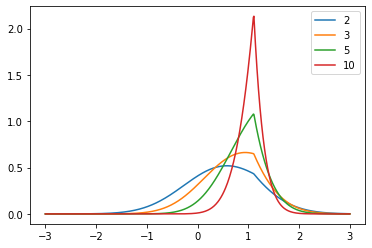

In [33]:
hist = rng.choice(100, size=4)
h = History(hist)

plt.plot(a, f_normal(h,a, 2 ))
plt.plot(a, f_normal(h,a, 3 ))
plt.plot(a, f_normal(h,a, 5 ))
plt.plot(a, f_normal(h,a, 10 ))

plt.legend([2,3,5,10])

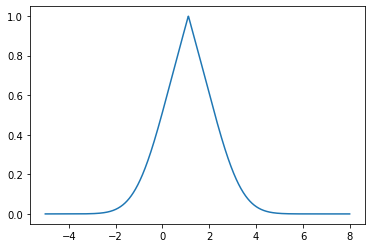

In [41]:
a = np.arange(-5,8,0.01)
plt.plot(a, 1 - norm.cdf(h.c2(a)) + norm.cdf(h.c1(a)))

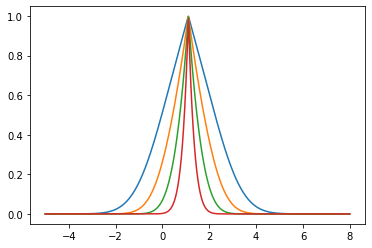

In [52]:
def pow_term(h, a, s):
    return (1 - norm.cdf(h.c2(a)) + norm.cdf(h.c1(a)))**(s-1)

plt.plot(a, pow_term(h,a,2))
plt.plot(a, pow_term(h,a,3))
plt.plot(a, pow_term(h,a,5))
plt.plot(a, pow_term(h,a,10))

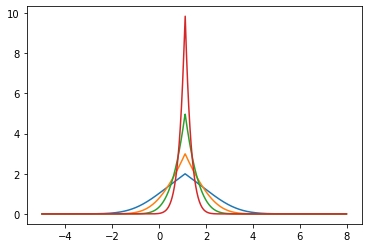

In [53]:
def s_pow_term(h, a, s):
    return s*(1 - norm.cdf(h.c2(a)) + norm.cdf(h.c1(a)))**(s-1)

plt.plot(a, s_pow_term(h,a,2))
plt.plot(a, s_pow_term(h,a,3))
plt.plot(a, s_pow_term(h,a,5))
plt.plot(a, s_pow_term(h,a,10))

As $s$ gets larger, the probability mass becomes more concentrated around opt_a.